In [1]:
from skimage import io as skio
from skimage import morphology as skmo
from skimage.filters import threshold_mean
from matplotlib import pyplot as plt
import numpy as np

In [2]:
operations_binary = [skmo.binary_erosion, skmo.binary_dilation, skmo.binary_opening, skmo.binary_closing]
operations_tone = [skmo.erosion, skmo.dilation, skmo.opening, skmo.closing]

In [47]:
def show_morphology(img, operations, selem=None, canal=False):
    fig, axes = plt.subplots(ncols=1 + len(operations), figsize=(18, 3))
    ax = axes.ravel()

    titles = ['Erosion', 'Dilation', 'Opening', 'Closing']
    
    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Original image')
    
    for i in range(len(operations)):
        if len(img.shape) == 3 and canal:
            img_new = np.zeros(img.shape, dtype=np.uint8)
            for j in range(img.shape[2]):
                img_new[:,:,j] = operations[i](img[:,:,j], selem)
            ax[i + 1].imshow(img_new)
        elif len(img.shape) == 3:
            ax[i + 1].imshow(operations[i](img, selem).astype(np.uint8))
        else:
            ax[i + 1].imshow(operations[i](img, selem), cmap=plt.cm.gray)
        ax[i + 1].set_title(titles[i])

    for a in ax:
        a.axis('off')

    plt.show()

In [29]:
img1 = skio.imread('thumbnail.jpeg', as_grey=True)
thresh = threshold_mean(img1)
img1 = img1 > thresh
img2 = skio.imread('thumbnail.jpeg', as_grey=True)
img3 = skio.imread('saint.jpeg')

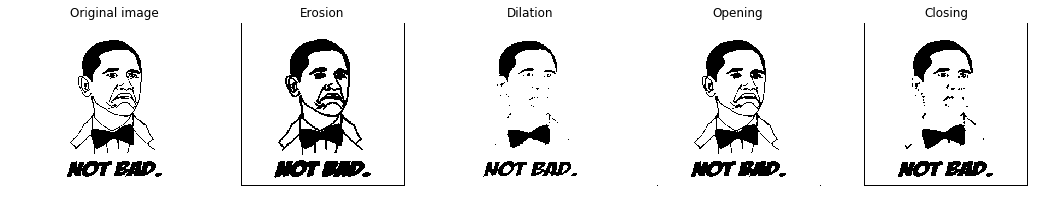

In [30]:
show_morphology(img1, operations_binary)

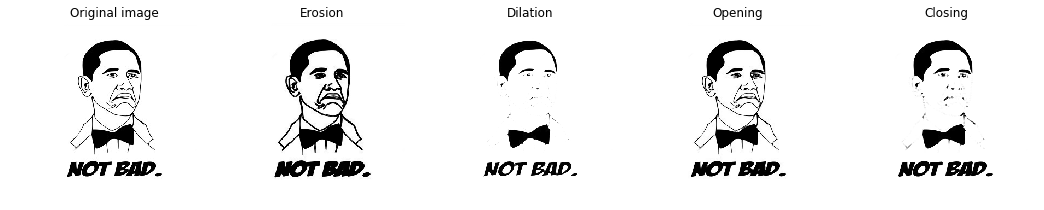

In [31]:
show_morphology(img2, operations_tone)

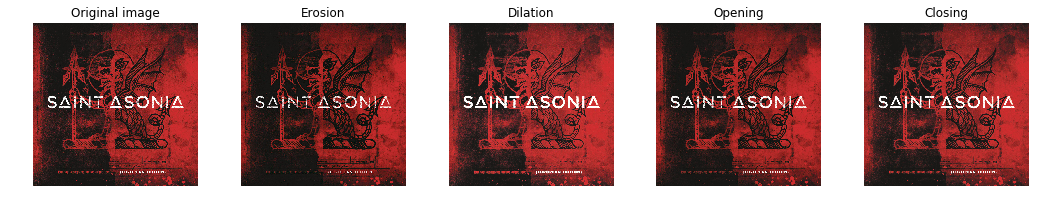

In [46]:
show_morphology(img3, operations_tone, canal=True)

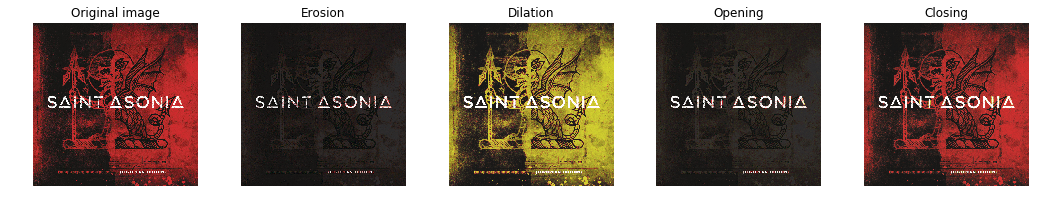

In [48]:
show_morphology(img3, operations_tone)

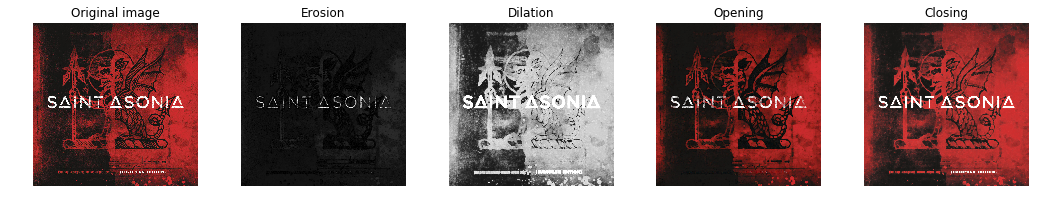

In [49]:
show_morphology(img3, operations_tone, skmo.cube(6))

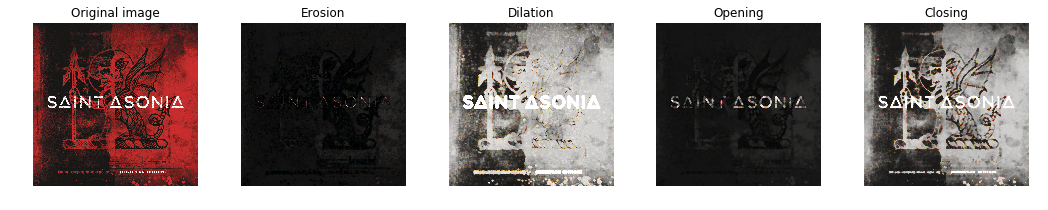

In [50]:
show_morphology(img3, operations_tone, skmo.octahedron(6))

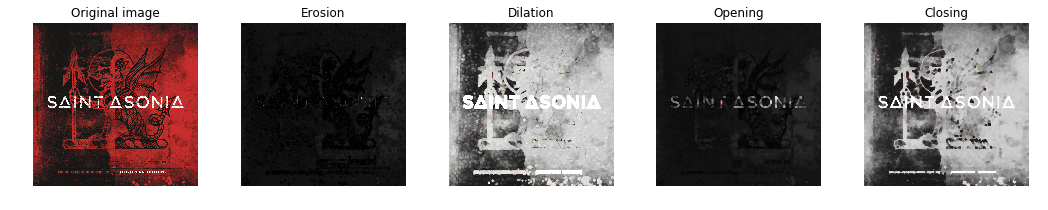

In [51]:
show_morphology(img3, operations_tone, skmo.ball(6))

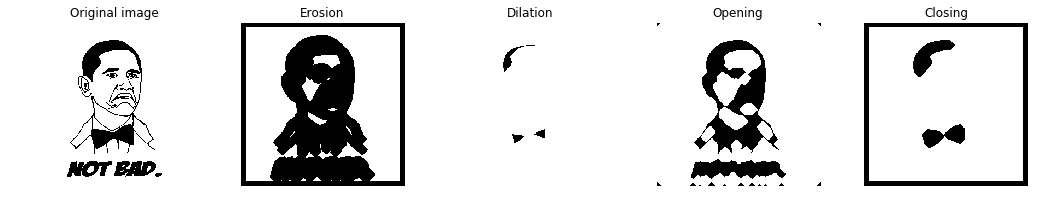

In [52]:
show_morphology(img1, operations_binary, skmo.octagon(3, 8))

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


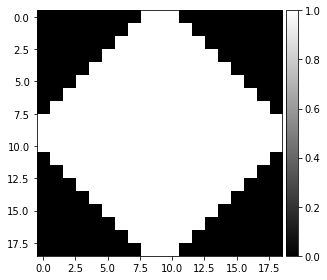

In [53]:
skio.imshow(skmo.octagon(3, 8), cmap=plt.cm.gray)